(lecture04:homework)=
# Homework 4

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ This is due before the beginning of the next lecture.
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Rashi
+ **Last Name:** Jain
+ **Email:** rashijain.x@gmail.com

Let me set you up with some nice code for plotting and downloading files.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

import requests
import os

def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Problem 1 - Visual analysis of a variable-speed compressor experiment

In this problem we are going to need [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google drive or just download it with the code segment below:

In [6]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx'
download(url)

import pandas as pd
data = pd.read_excel('compressor_data.xlsx')
data

T_e  DT_sh   T_c  DT_sc  T_amb   f  m_dot    m_dot.1  Capacity  Power  \
0   -30      11   25      8     35  60   28.8   8.000000      1557    901   
1   -30      11   30      8     35  60   23.0   6.388889      1201    881   
2   -30      11   35      8     35  60   17.9   4.972222       892    858   
3   -25      11   25      8     35  60   46.4  12.888889      2509   1125   
4   -25      11   30      8     35  60   40.2  11.166667      2098   1122   
..  ...     ...  ...    ...    ...  ..    ...        ...       ...    ...   
60   10      11   45      8     35  60  245.2  68.111111     12057   2525   
61   10      11   50      8     35  60  234.1  65.027778     10939   2740   
62   10      11   55      8     35  60  222.2  61.722222      9819   2929   
63   10      11   60      8     35  60  209.3  58.138889      8697   3091   
64   10      11   65      8     35  60  195.4  54.277778      7575   3223   

    Current   COP  Efficiency  
0       4.4  1.73       0.467  
1       4.0  1.36       0.425  
2       3.7  1.04       0.382  
3       5.3  2.23       0.548  
4       5.1  1.87       0.519  
..      ...   ...         ...  
60     11.3  4.78       0.722  
61     12.3  3.99       0.719  
62     13.1  3.35       0.709  
63     13.7  2.81       0.693  
64     14.2  2.35       0.672  

[65 rows x 13 columns]

The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in degrees C) and they measured various other quantities.
Our goal is to understand the experimental design and develop some understanding of the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
Answer the following questions.

+ Do the scatter plot of $T_e$ and $T_c$. This will reveal the experimental design picked by the experimentalists. Make sure you label the axes correctly. Hint: These are columns `T_e` and `T_c` of the data frame `data`. 

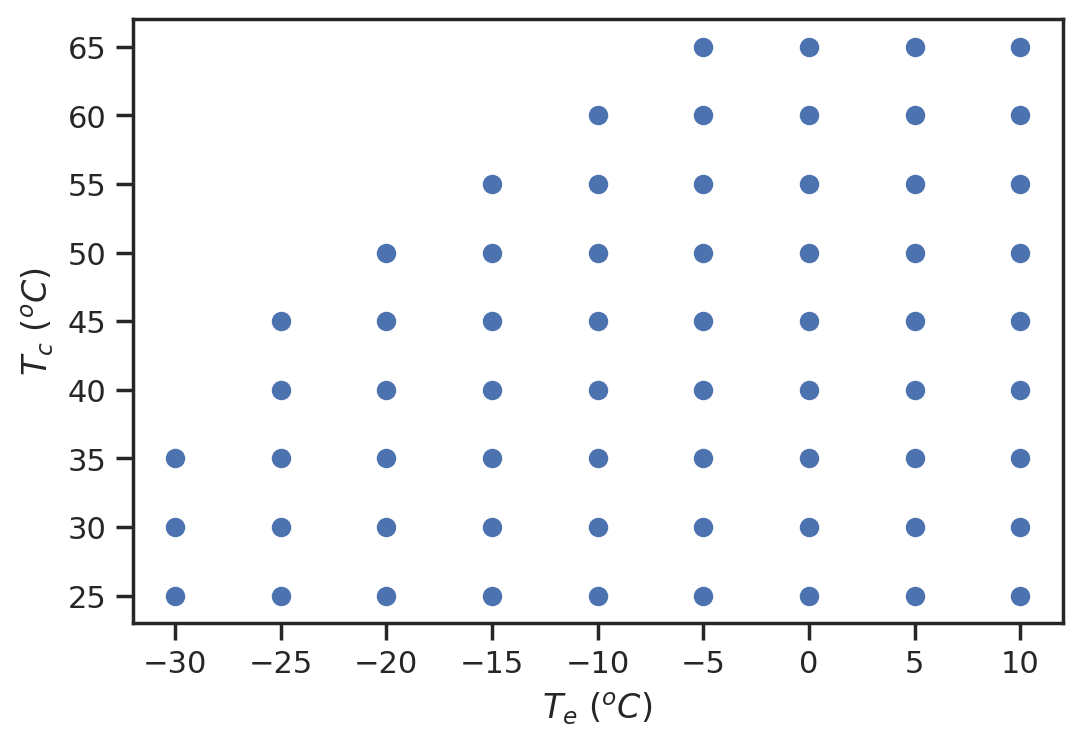

In [7]:
fig, ax = plt.subplots()
ax.scatter(data['T_e'], data['T_c'])
ax.set_xlabel('$T_e$ $({}^o C)$')
ax.set_ylabel('$T_c$ $({}^o C)$');

+ Is there a gap in the experimental design? If yes, why do you think they have a gap?

The gap in the experimental study is identified in the top left area. No sample areas are taken from that area. Another gap in the study could be in the ranges of sample data for $T_e$ and $T_c$ identified. Different ranges are chosen for each. So all the other data outside these ranges is a gap. It is possible the gap is there because the reserachers identified those temperature ranges to be outside the laws of physics, or not as areas of interest for the reserach. 

+ Do the scatter plot between `T_e` and `Capacity`.

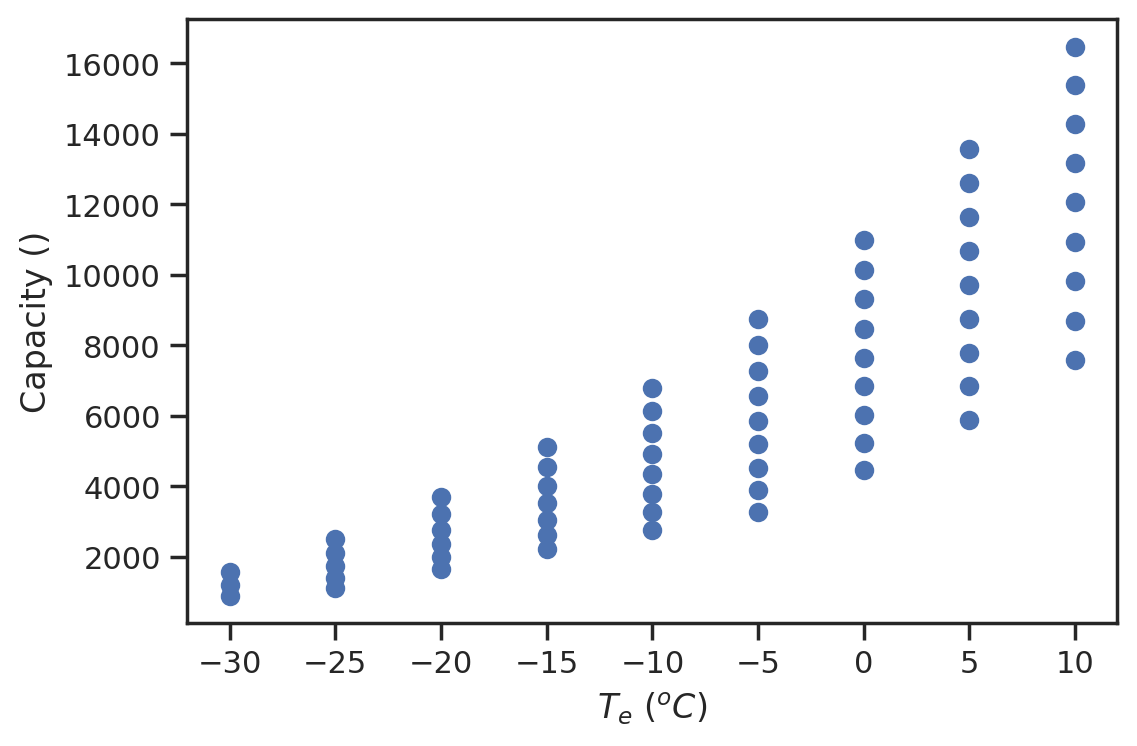

In [8]:
fig, ax = plt.subplots()
ax.scatter(data['T_e'], data['Capacity'])
ax.set_xlabel('$T_e$ $({}^o C)$')
ax.set_ylabel('Capacity ()');

+ Do the scatter plot between `T_c` and `Capacity`.

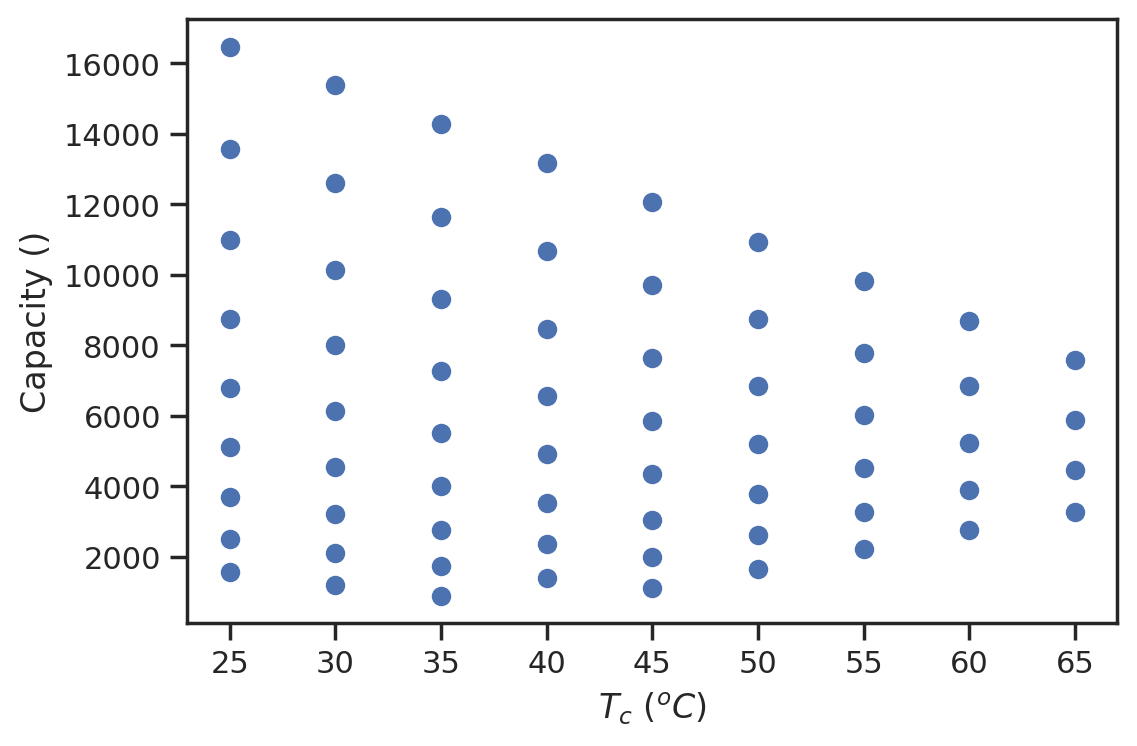

In [9]:
fig, ax = plt.subplots()
ax.scatter(data['T_c'], data['Capacity'])
ax.set_xlabel('$T_c$ $({}^o C)$')
ax.set_ylabel('Capacity ()');

+ Do the scatter plot between `T_e` and `Power`.

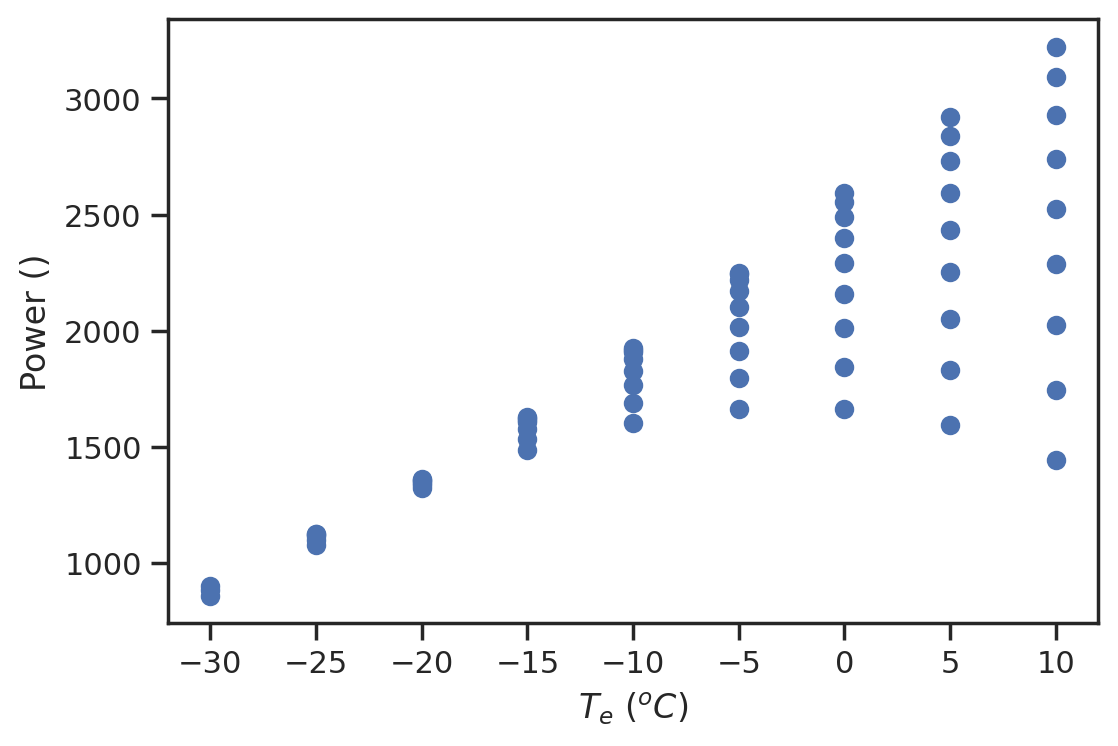

In [10]:
fig, ax = plt.subplots()
ax.scatter(data['T_e'], data['Power'])
ax.set_xlabel('$T_e$ $({}^o C)$')
ax.set_ylabel('Power ()');

+ Do the scatter plot between `T_c` and `Power`.

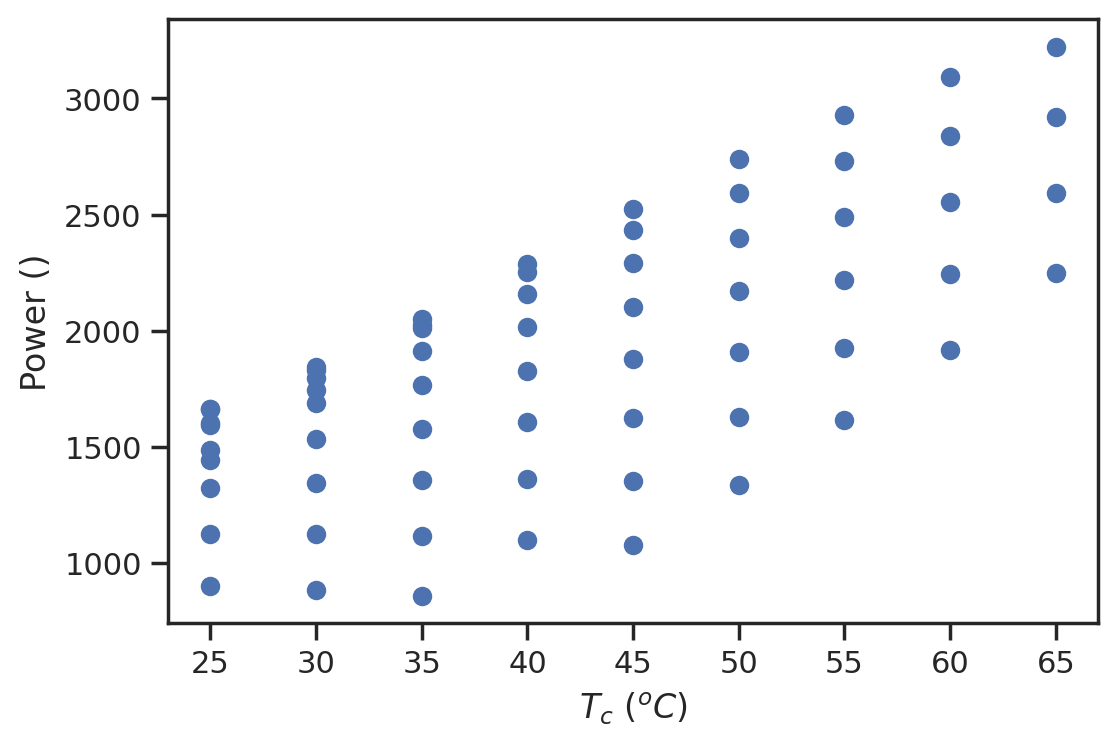

In [11]:
fig, ax = plt.subplots()
ax.scatter(data['T_c'], data['Power'])
ax.set_xlabel('$T_c$ $({}^o C)$')
ax.set_ylabel('Power ()');

+ We are lucky that we only have two experimental control variables because can do a bit more thing with scatter. You can color each point in the scatter plot according to a scale that follows an output variable. Let me show you what I mean by doing the plot for the `Capacity`.

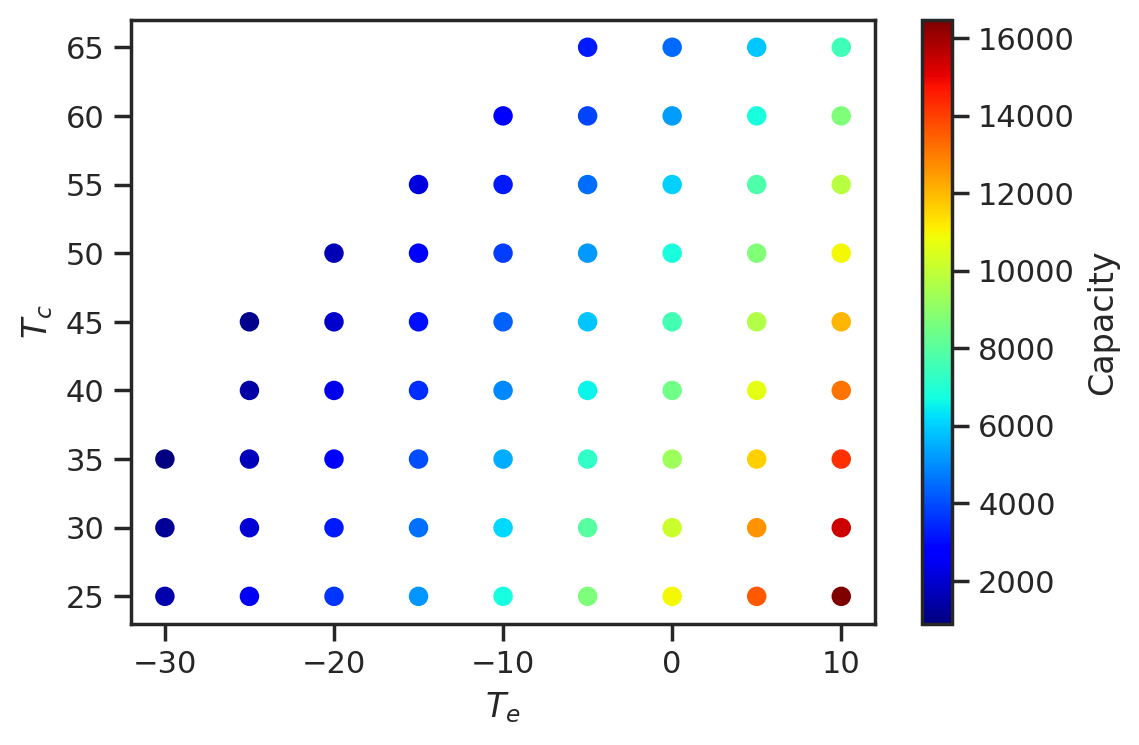

In [12]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(data['T_e'], data['T_c'], # So far a standard scatter plot
                c=data['Capacity'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Capacity')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

Now repeat the same thing for the `Power`:

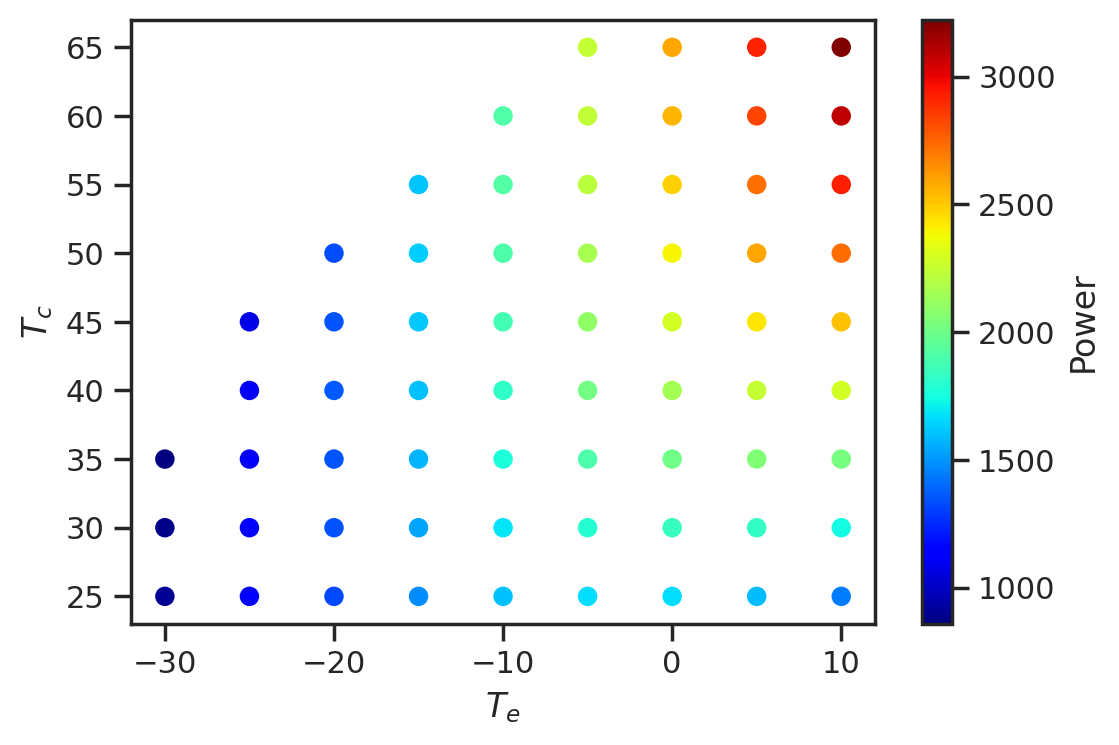

In [13]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(data['T_e'], data['T_c'], # So far a standard scatter plot
                c=data['Power'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Power')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

## Problem 2 - Visual analysis of an airfoil experiment

In this problem, you are going to repeat what you did in Problem 1, but without my guidance!

The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)
From this reference, the descreption of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
> 
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. Angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level, in decibels.

Before we start, let's download and load the data.
I am going to put them in a dataframe for you.

In [14]:
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
download(url)
raw_data = np.loadtxt('airfoil_self_noise.dat')
df = pd.DataFrame(raw_data, columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                                 'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

Frequency  Angle_of_attack  Chord_length  Velocity  Suction_thickness  \
0         800.0              0.0        0.3048      71.3           0.002663   
1        1000.0              0.0        0.3048      71.3           0.002663   
2        1250.0              0.0        0.3048      71.3           0.002663   
3        1600.0              0.0        0.3048      71.3           0.002663   
4        2000.0              0.0        0.3048      71.3           0.002663   
...         ...              ...           ...       ...                ...   
1498     2500.0             15.6        0.1016      39.6           0.052849   
1499     3150.0             15.6        0.1016      39.6           0.052849   
1500     4000.0             15.6        0.1016      39.6           0.052849   
1501     5000.0             15.6        0.1016      39.6           0.052849   
1502     6300.0             15.6        0.1016      39.6           0.052849   

      Sound_pressure  
0            126.201  
1            125.201  
2            125.951  
3            127.591  
4            127.461  
...              ...  
1498         110.264  
1499         109.254  
1500         106.604  
1501         106.224  
1502         104.204  

[1503 rows x 6 columns]

+ Do the histogtrams of all variables. Use as many code segments you need below to plot the histogram of each variable in a different plot. Make sure you label the axes correctly.

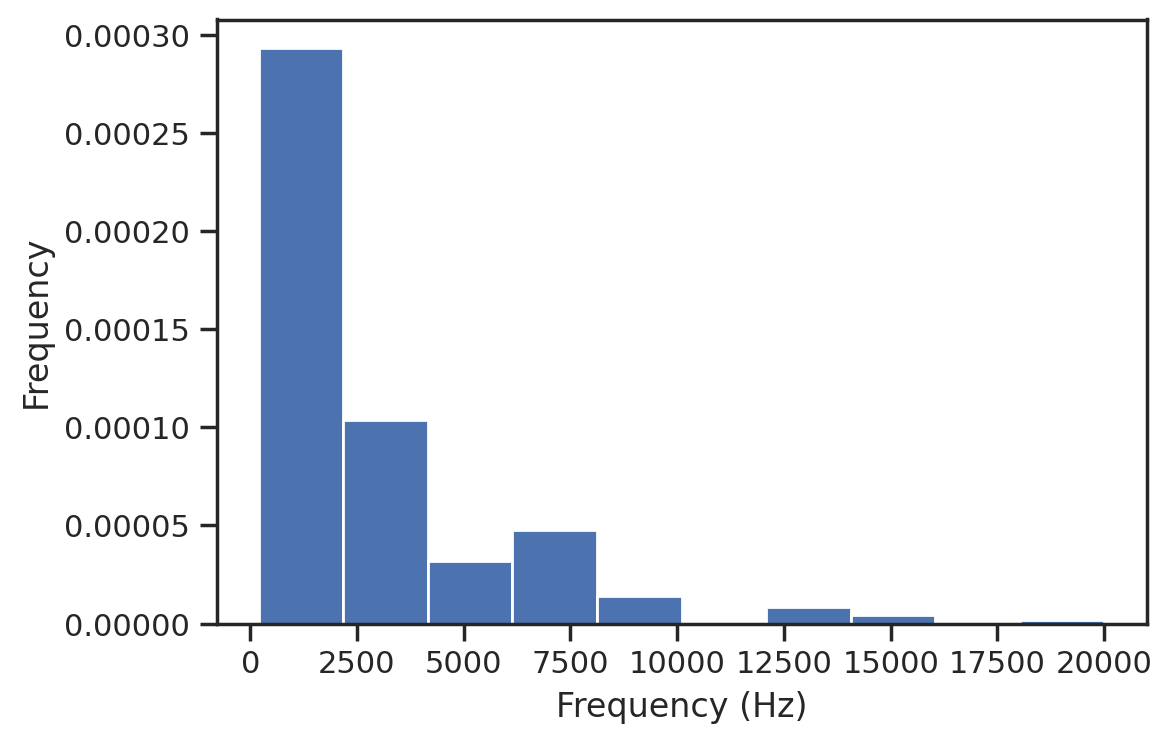

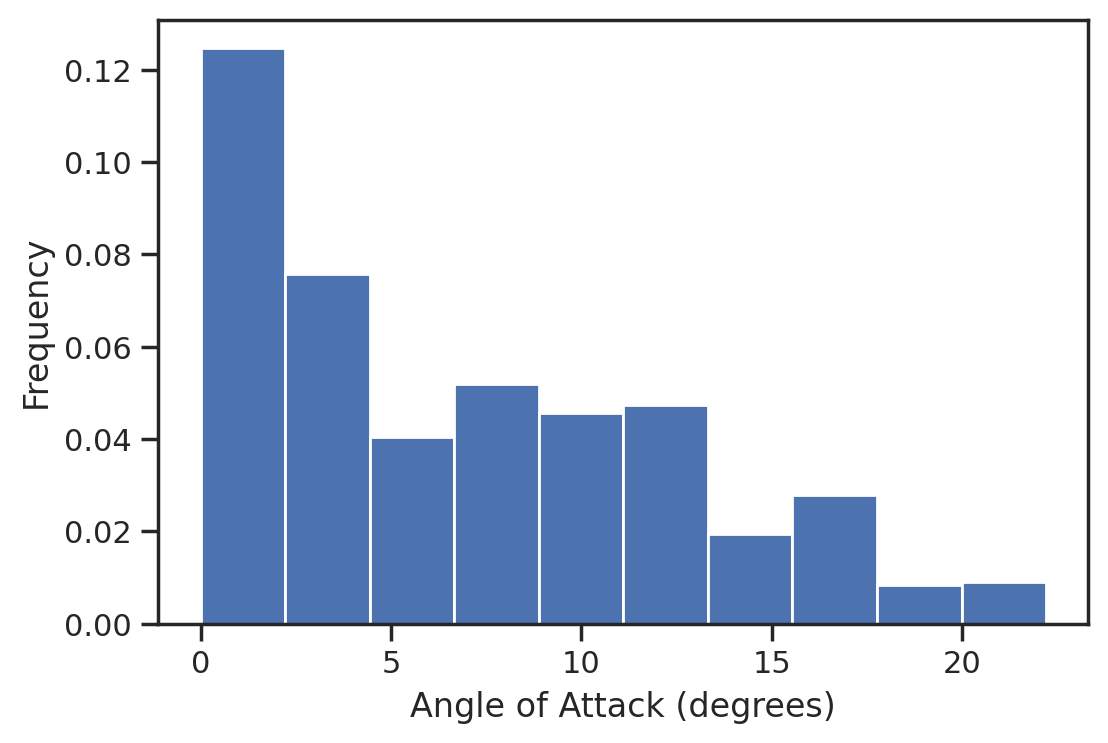

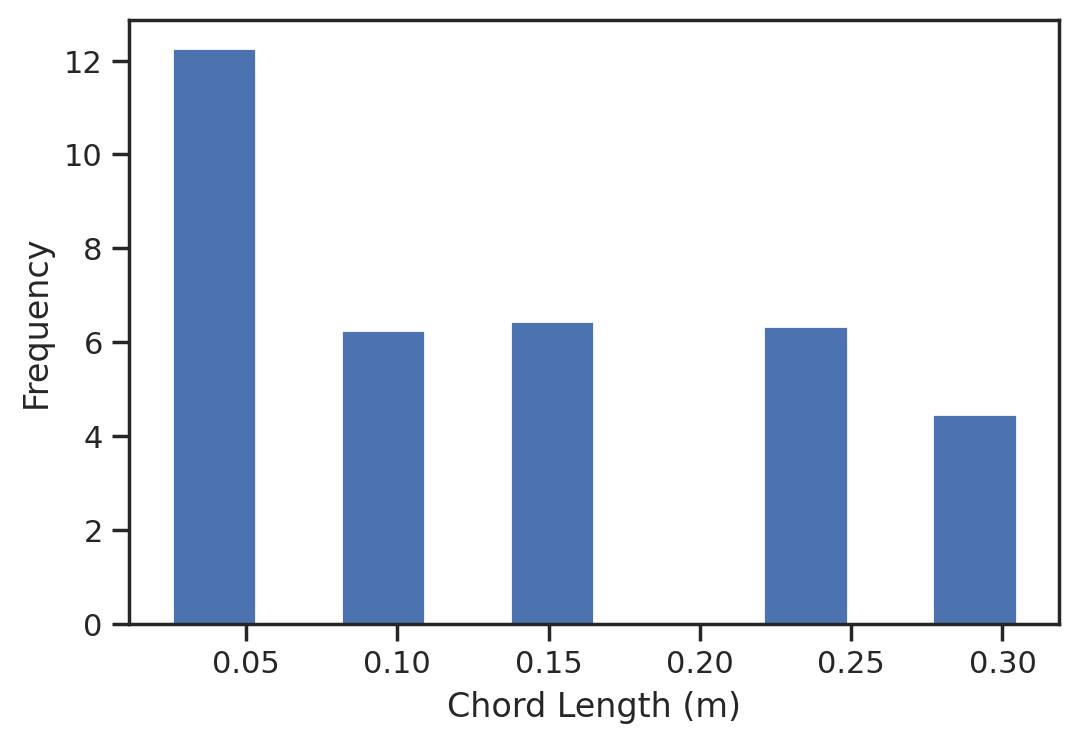

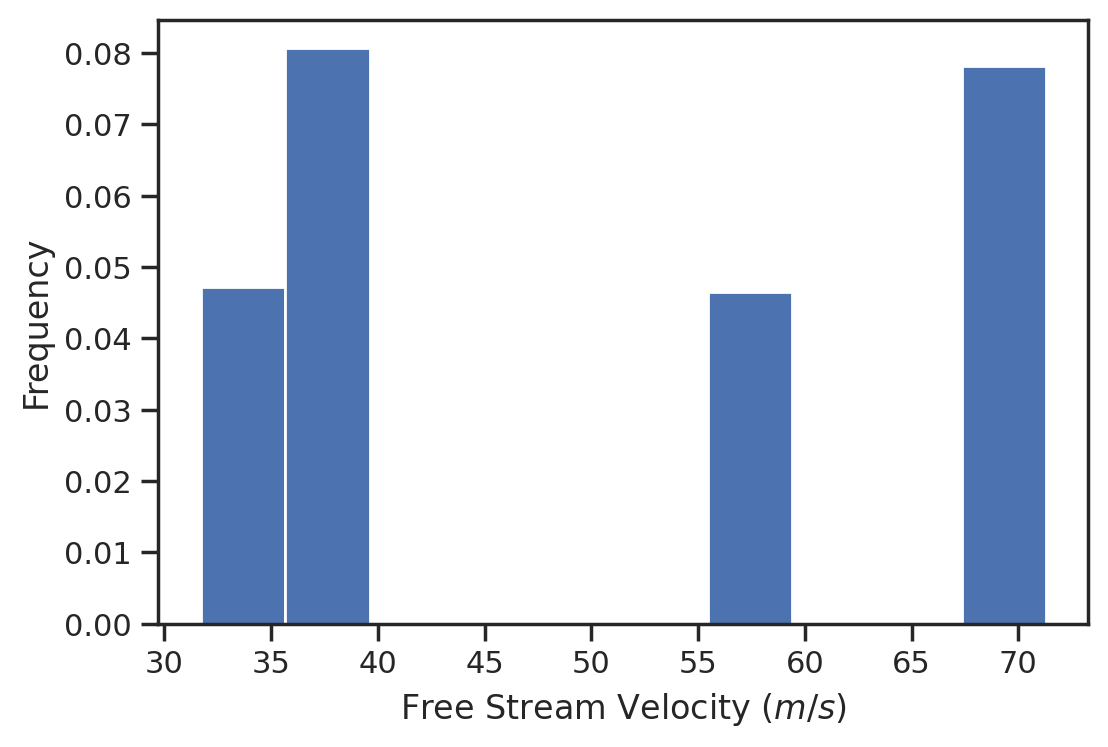

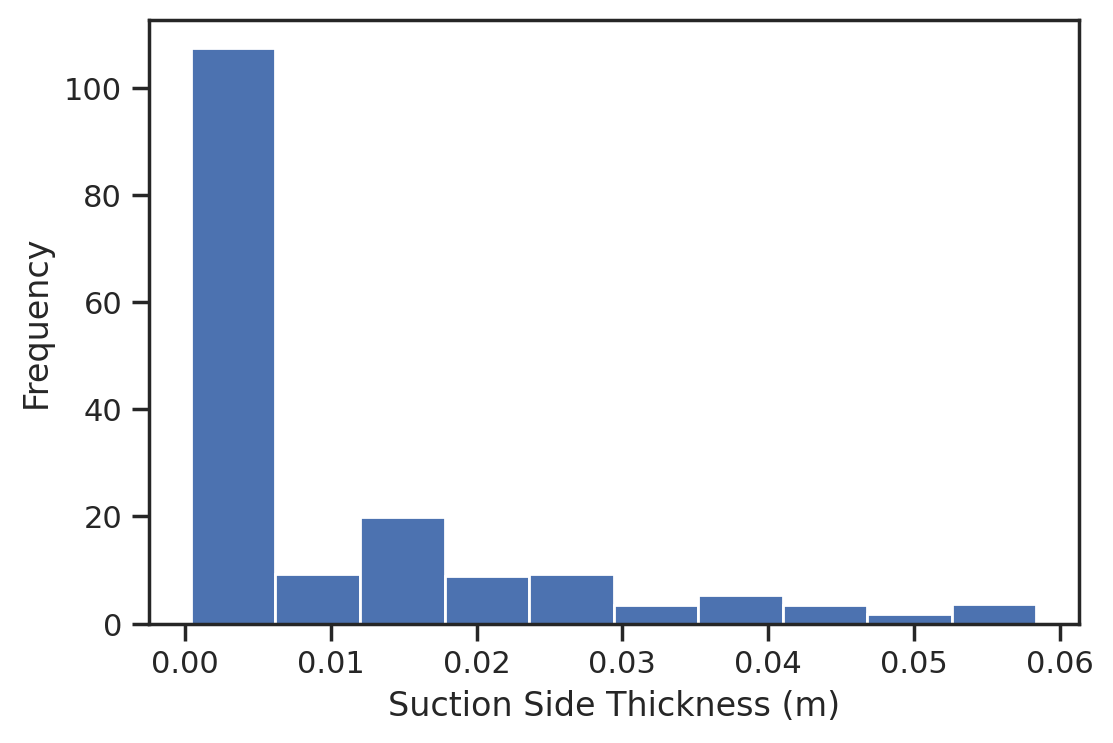

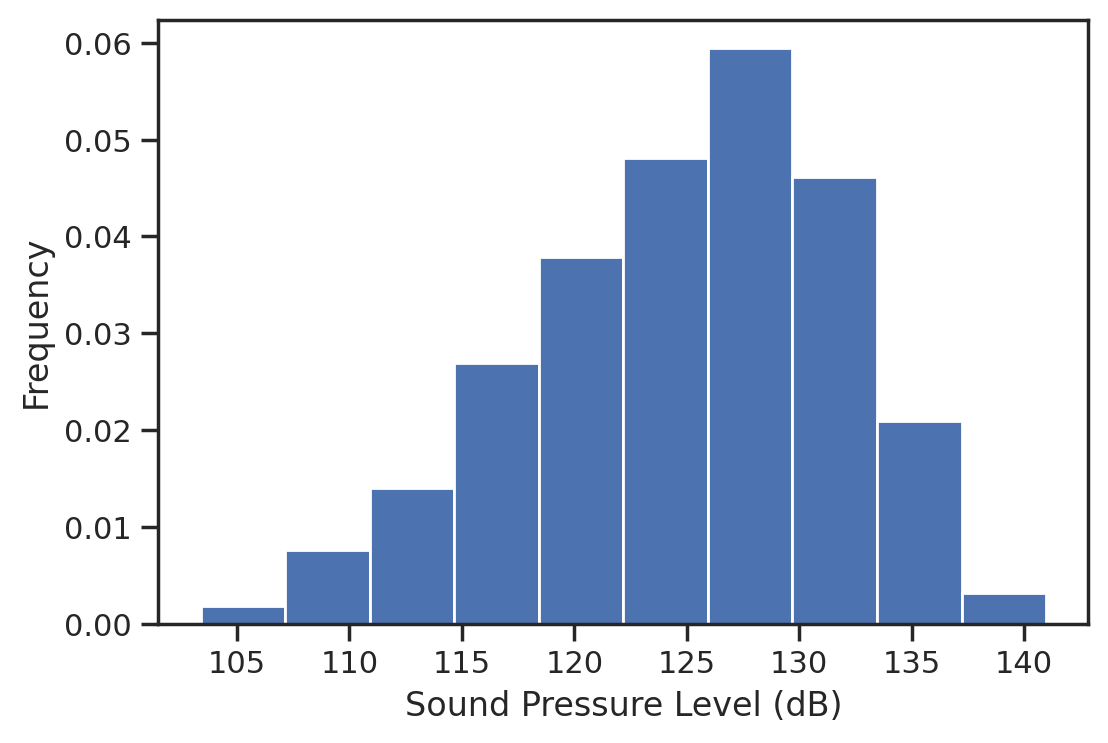

In [15]:
fig, ax = plt.subplots()
ax.hist(df['Frequency'], density=True)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Frequency');

fig, ax = plt.subplots()
ax.hist(df['Angle_of_attack'], density=True)
ax.set_xlabel('Angle of Attack (degrees)')
ax.set_ylabel('Frequency');

fig, ax = plt.subplots()
ax.hist(df['Chord_length'], density=True)
ax.set_xlabel('Chord Length (m)')
ax.set_ylabel('Frequency');

fig, ax = plt.subplots()
ax.hist(df['Velocity'], density=True)
ax.set_xlabel('Free Stream Velocity $(m/s)$')
ax.set_ylabel('Frequency');

fig, ax = plt.subplots()
ax.hist(df['Suction_thickness'], density=True)
ax.set_xlabel('Suction Side Thickness (m)')
ax.set_ylabel('Frequency');

fig, ax = plt.subplots()
ax.hist(df['Sound_pressure'], density=True)
ax.set_xlabel('Sound Pressure Level (dB)')
ax.set_ylabel('Frequency');

+ Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions. Are there any holes in the experimental dataset, i.e., places where you have no data?

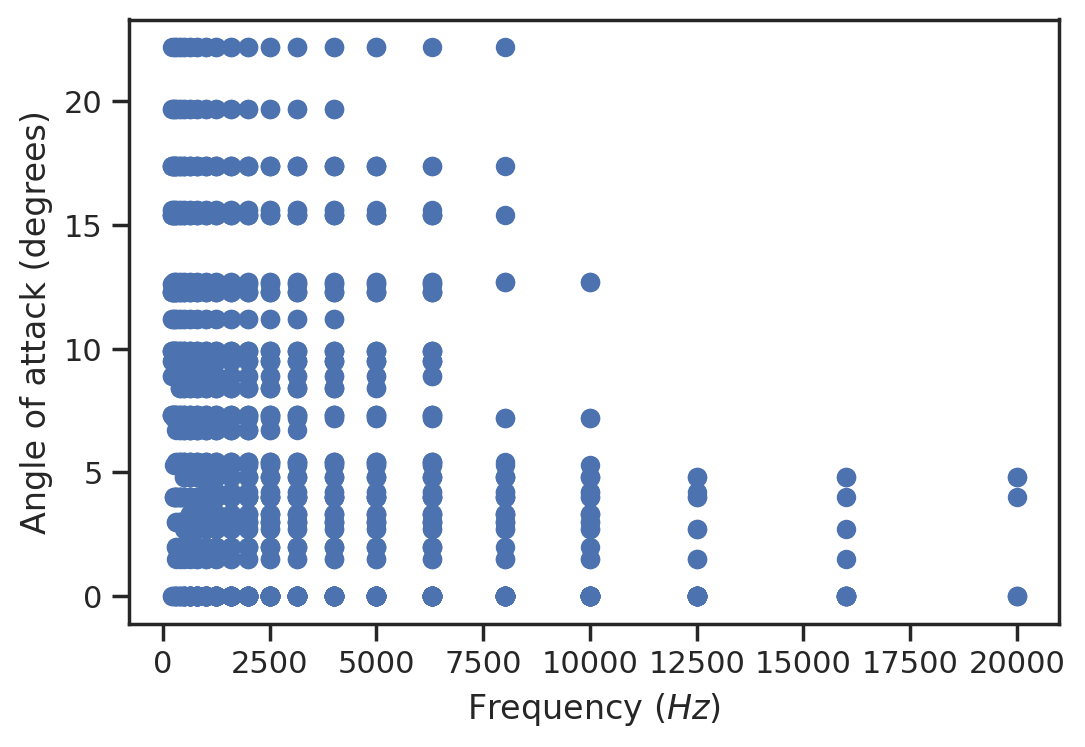

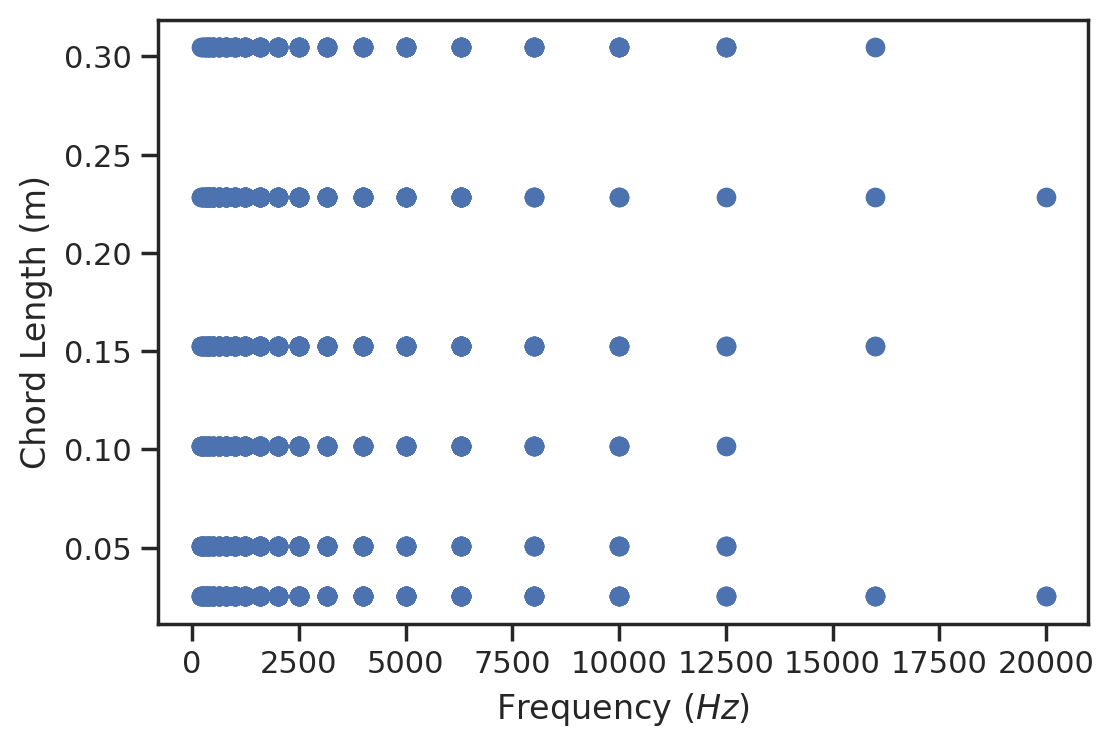

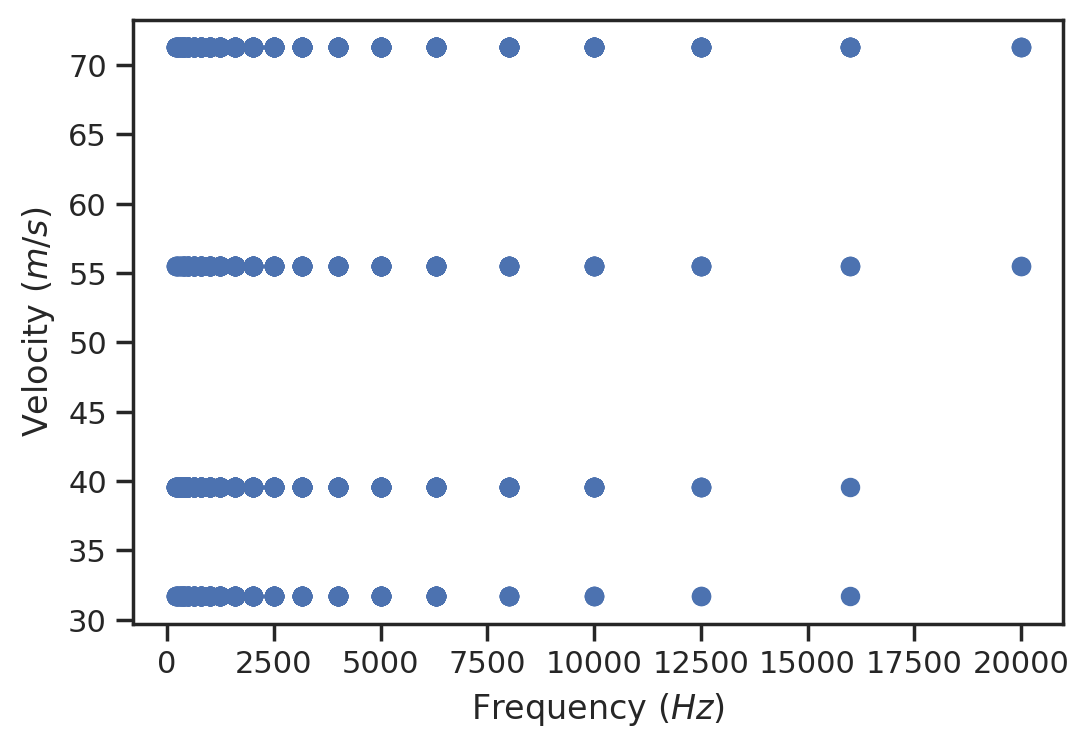

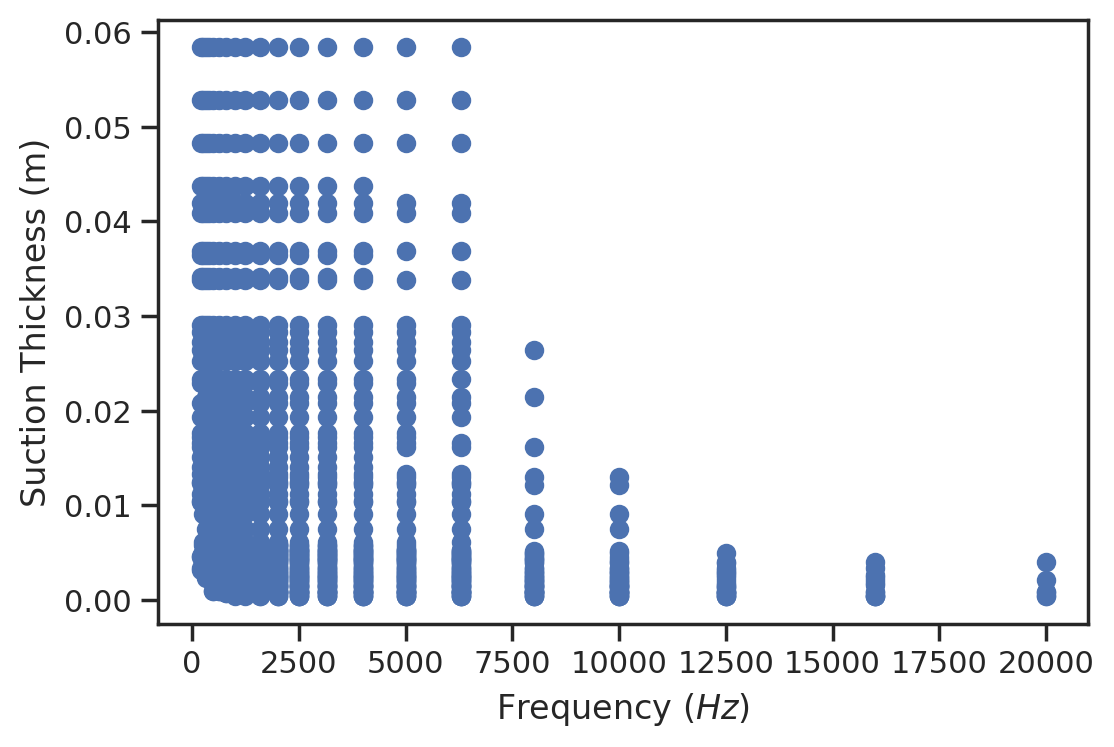

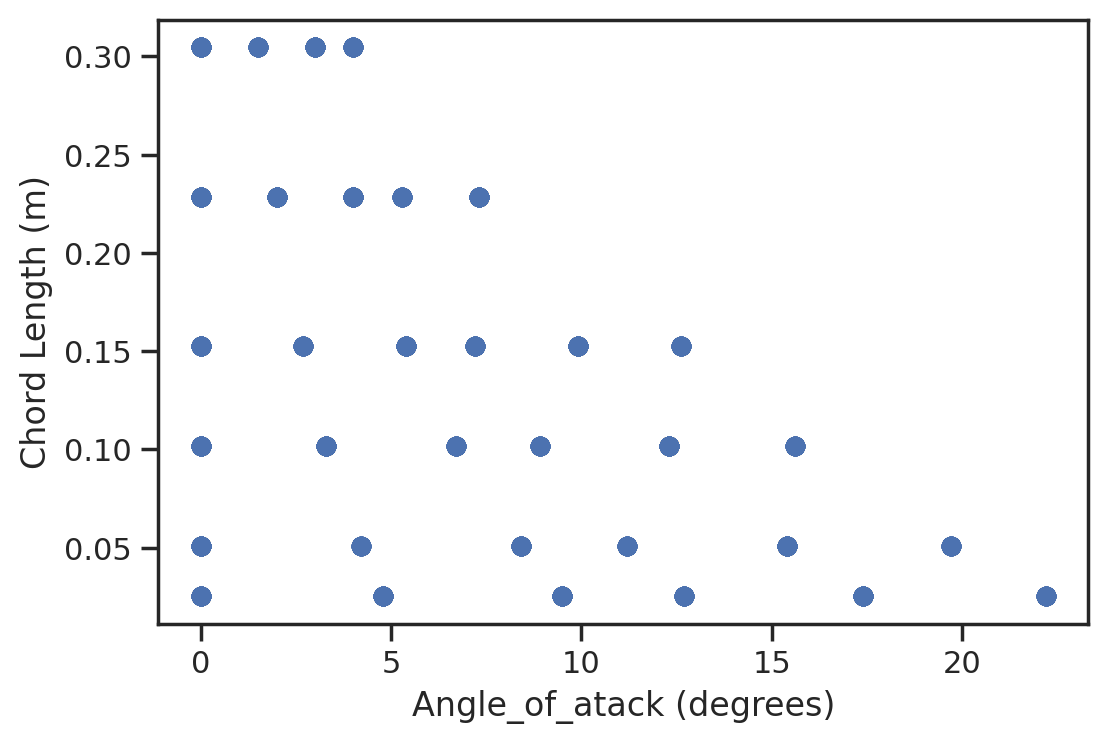

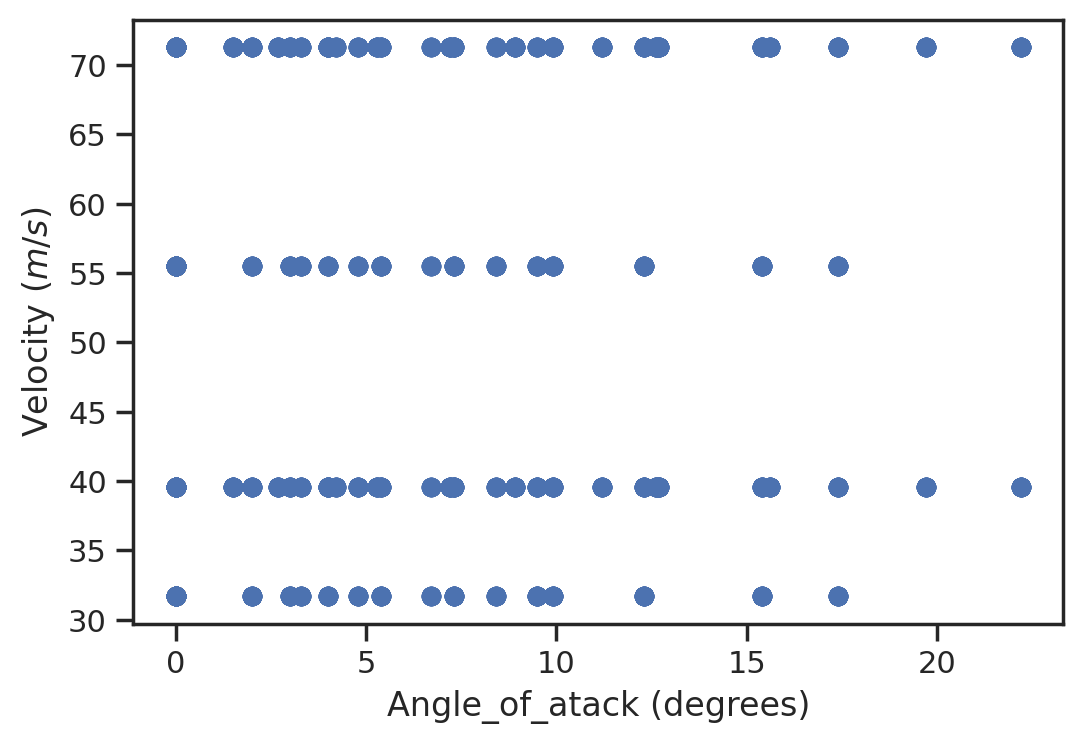

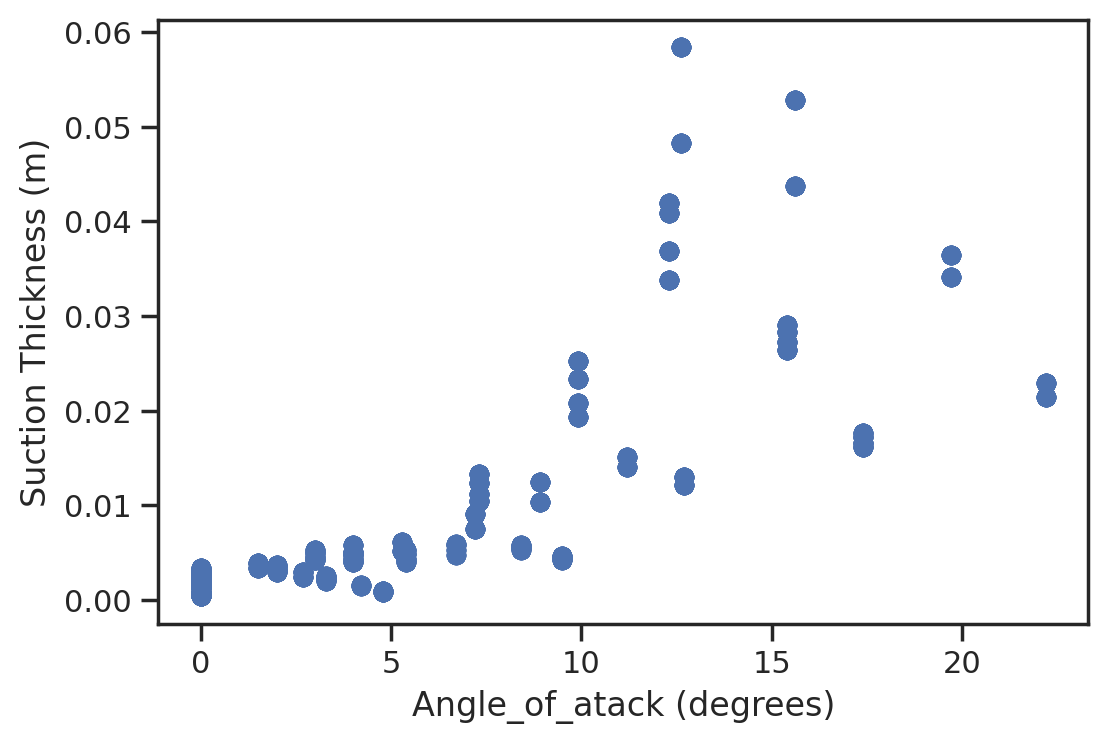

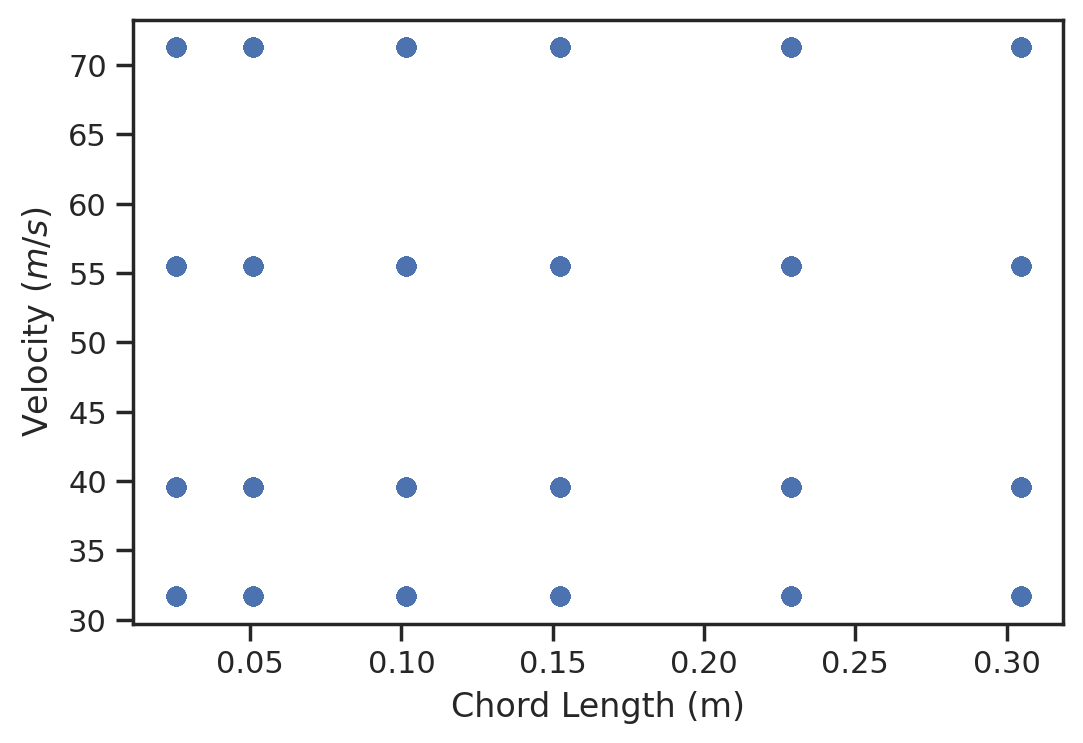

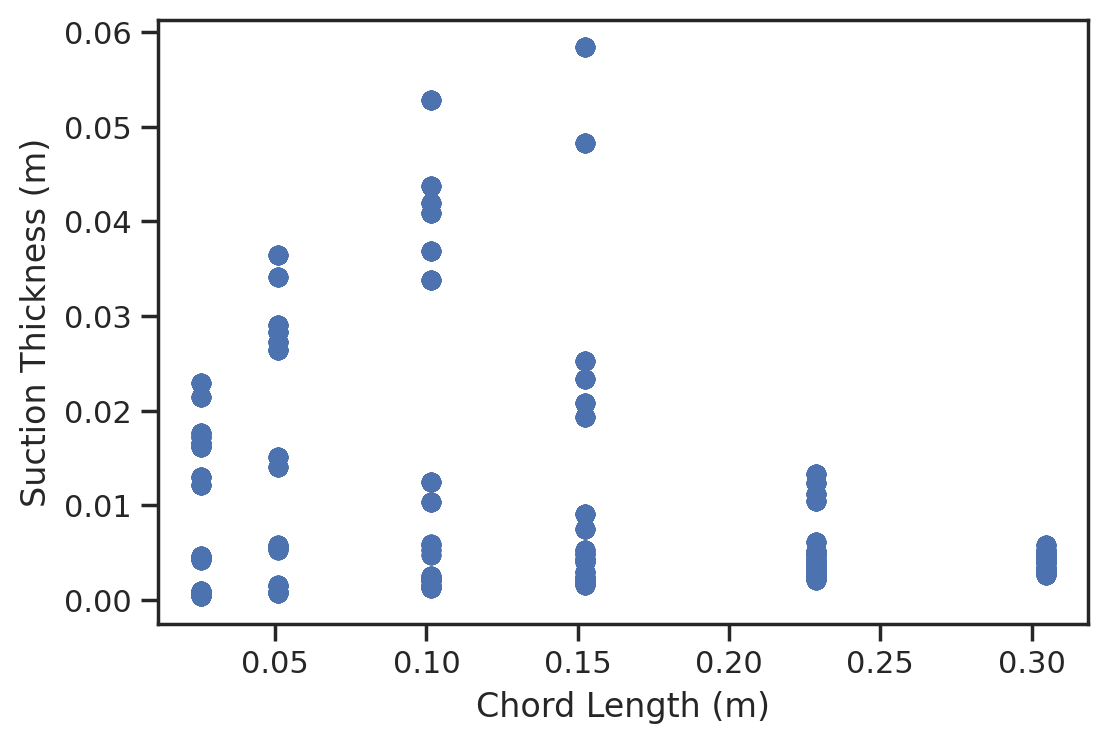

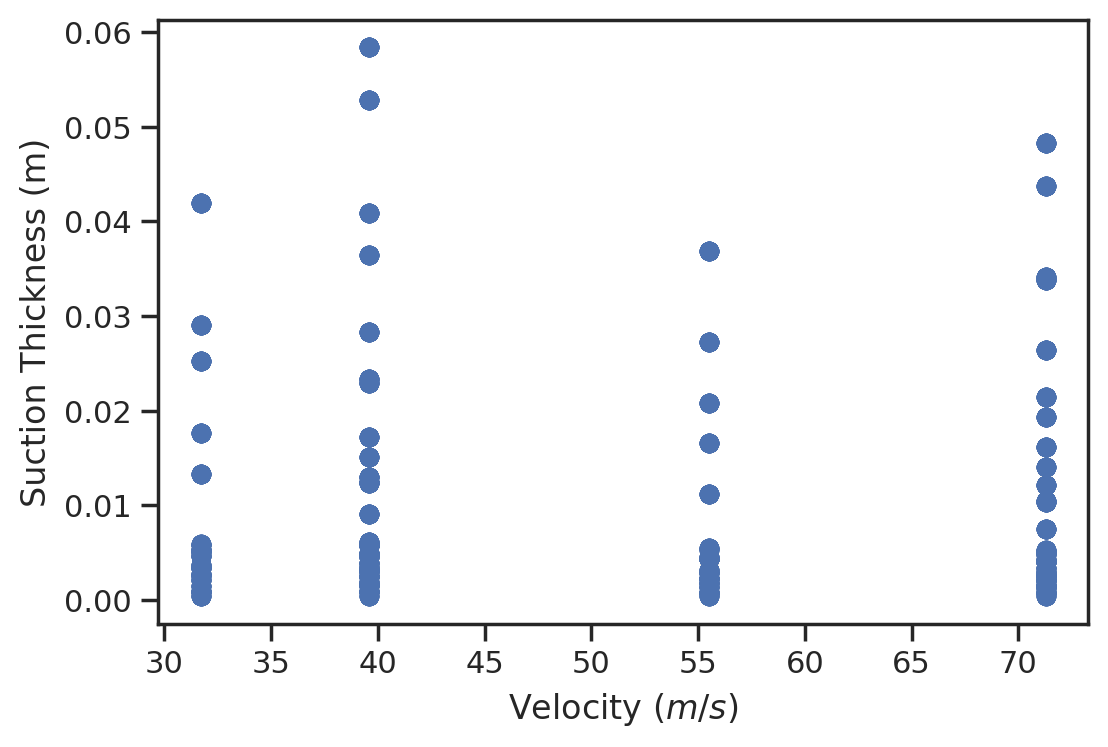

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Angle_of_attack'])
ax.set_xlabel('Frequency $(Hz)$')
ax.set_ylabel('Angle of attack (degrees)');

fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Chord_length'])
ax.set_xlabel('Frequency $(Hz)$')
ax.set_ylabel('Chord Length (m)');

fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Velocity'])
ax.set_xlabel('Frequency $(Hz)$')
ax.set_ylabel('Velocity $(m/s)$');

fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Suction_thickness'])
ax.set_xlabel('Frequency $(Hz)$')
ax.set_ylabel('Suction Thickness (m)');

fig, ax = plt.subplots()
ax.scatter(df['Angle_of_attack'], df['Chord_length'])
ax.set_xlabel('Angle_of_atack (degrees)')
ax.set_ylabel('Chord Length (m)');

fig, ax = plt.subplots()
ax.scatter(df['Angle_of_attack'], df['Velocity'])
ax.set_xlabel('Angle_of_atack (degrees)')
ax.set_ylabel('Velocity $(m/s)$');

fig, ax = plt.subplots()
ax.scatter(df['Angle_of_attack'], df['Suction_thickness'])
ax.set_xlabel('Angle_of_atack (degrees)')
ax.set_ylabel('Suction Thickness (m)');

fig, ax = plt.subplots()
ax.scatter(df['Chord_length'], df['Velocity'])
ax.set_xlabel('Chord Length (m)')
ax.set_ylabel('Velocity $(m/s)$');

fig, ax = plt.subplots()
ax.scatter(df['Chord_length'], df['Suction_thickness'])
ax.set_xlabel('Chord Length (m)')
ax.set_ylabel('Suction Thickness (m)');

fig, ax = plt.subplots()
ax.scatter(df['Velocity'], df['Suction_thickness'])
ax.set_xlabel('Velocity $(m/s)$')
ax.set_ylabel('Suction Thickness (m)');


Any missing datapoints in the plots above represents a missing sample (hole). Ideally, we'd want to run every possible set and combination of all the variables above for a complete data. 

+  Do the scatter plot between each input variable and the output. This will give you an idea of the relationship between each input and the output. Do you observe any obvious patterns?

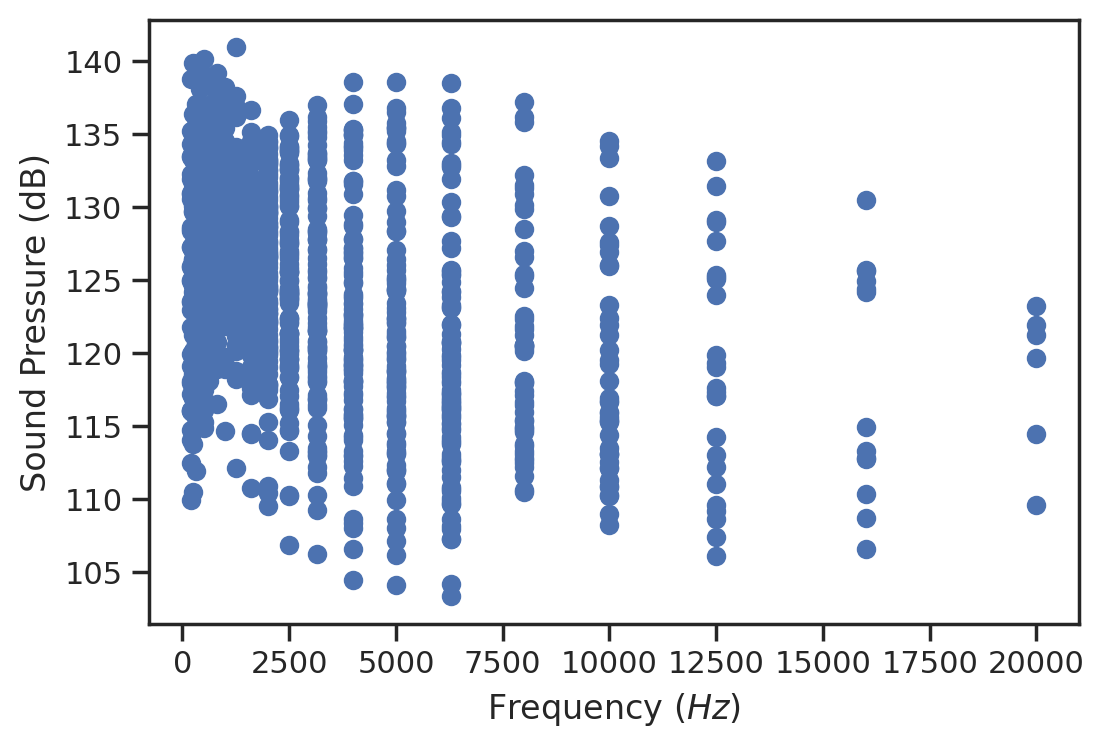

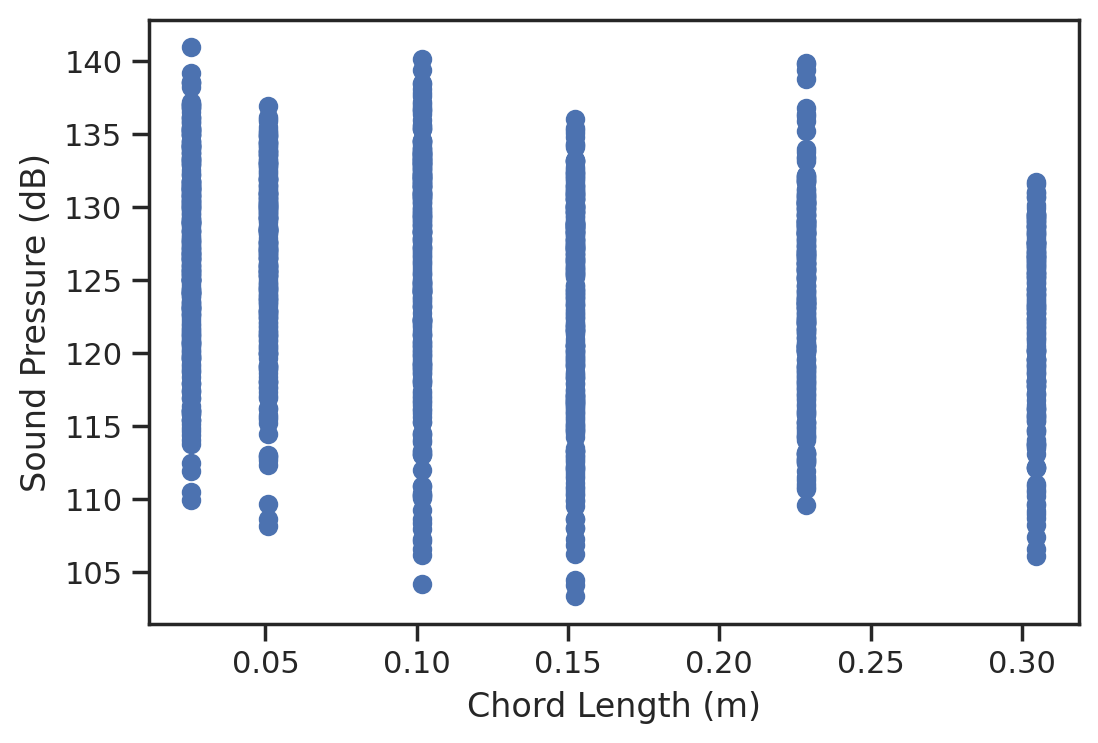

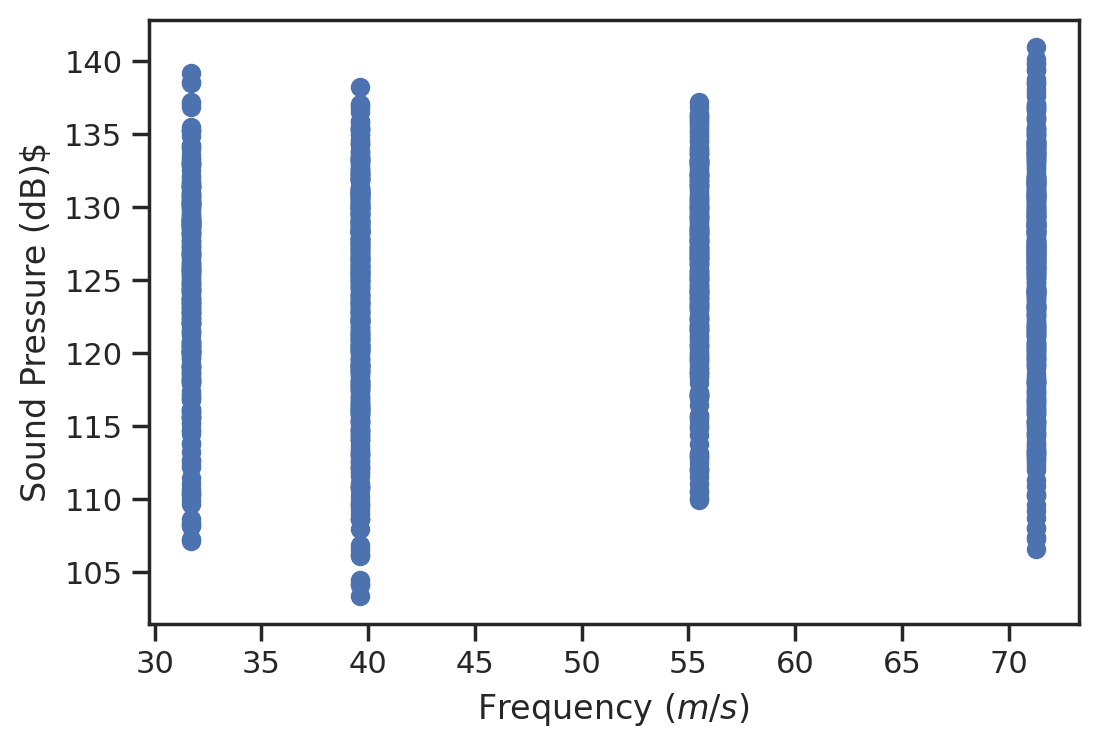

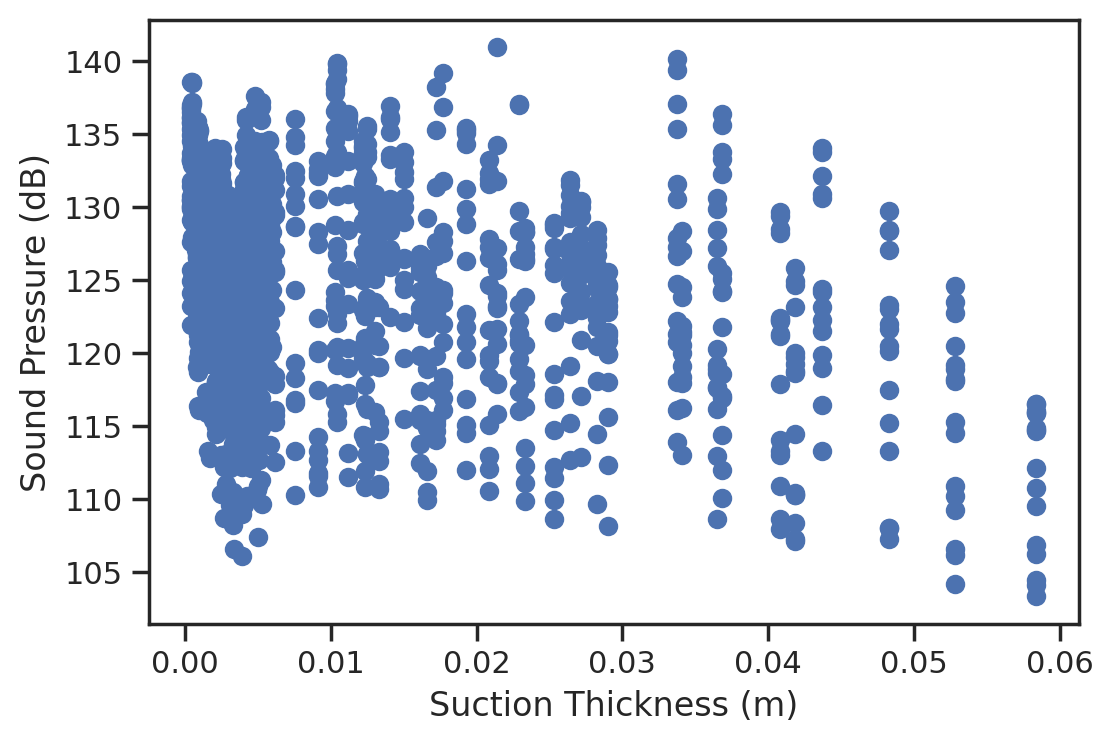

In [18]:
fig, ax = plt.subplots()
ax.scatter(df['Frequency'], df['Sound_pressure'])
ax.set_xlabel('Frequency $(Hz)$')
ax.set_ylabel('Sound Pressure (dB)');

fig, ax = plt.subplots()
ax.scatter(df['Chord_length'], df['Sound_pressure'])
ax.set_xlabel('Chord Length (m)')
ax.set_ylabel('Sound Pressure (dB)');

fig, ax = plt.subplots()
ax.scatter(df['Velocity'], df['Sound_pressure'])
ax.set_xlabel('Frequency $(m/s)$')
ax.set_ylabel('Sound Pressure (dB)$');

fig, ax = plt.subplots()
ax.scatter(df['Suction_thickness'], df['Sound_pressure'])
ax.set_xlabel('Suction Thickness (m)')
ax.set_ylabel('Sound Pressure (dB)');


Each input variable outputs a range of sound pressure levels. The output sounds pressure (dB) are always in the range of 105 - 140 dB, giving the impression that within a given (these) range of inputs the ouput sounds level will always stay in this range. 

+ Now pick the two input variables you think are the most important and do the scatter plot between them using the output to color the points (see the last question of Problem 1). Feel free to repeat it with more than two pairs of inputs if you want. Briefly discuss your findings.

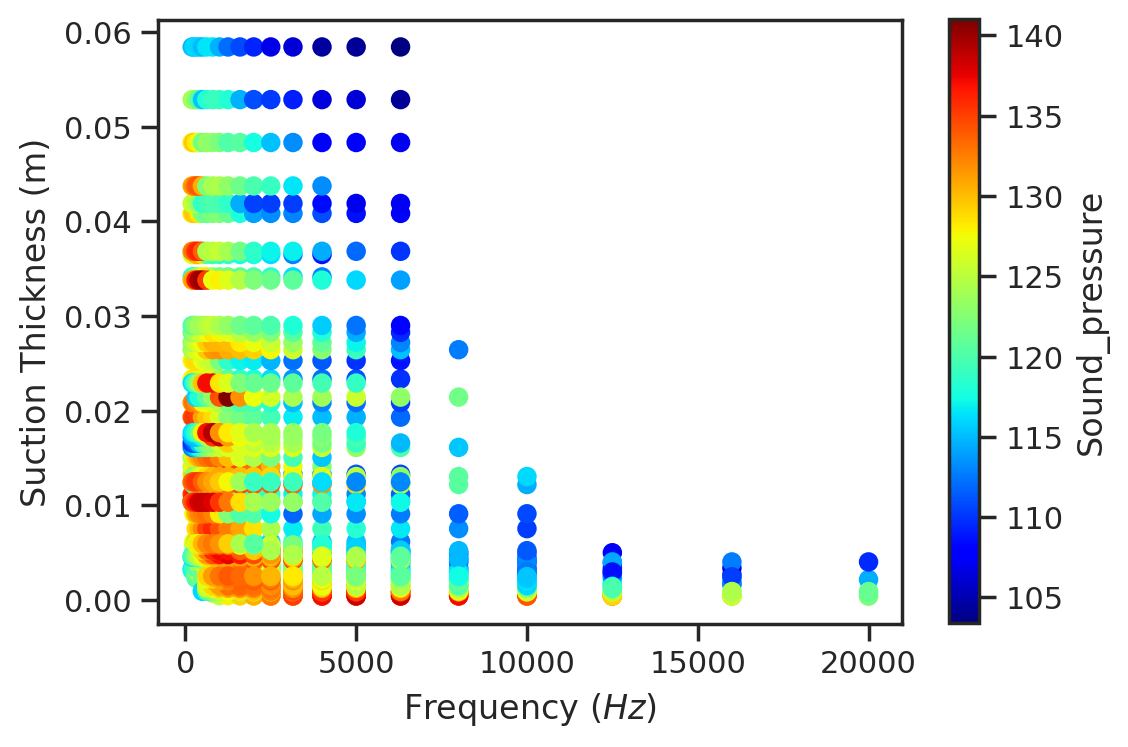

In [24]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(df['Frequency'], df['Suction_thickness'], 
                c=df['Sound_pressure'], 
                cmap=cm.jet      
               )
plt.colorbar(cs, label='Sound_pressure')  
ax.set_xlabel('Frequency $(Hz)$')
ax.set_ylabel('Suction Thickness (m)');


I chose Frequency and Suction Thickenss, since they had the most random behavior in input-output scatter plot above. Sound pressure values of the combinations of frequency (Hz) - suction thickness (m) are shown in the colormap almost froming an increasing gradient from top right to bottom left. 